In [110]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [111]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [112]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [113]:
data=df.drop(columns=['Unnamed: 0'])

In [114]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [115]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


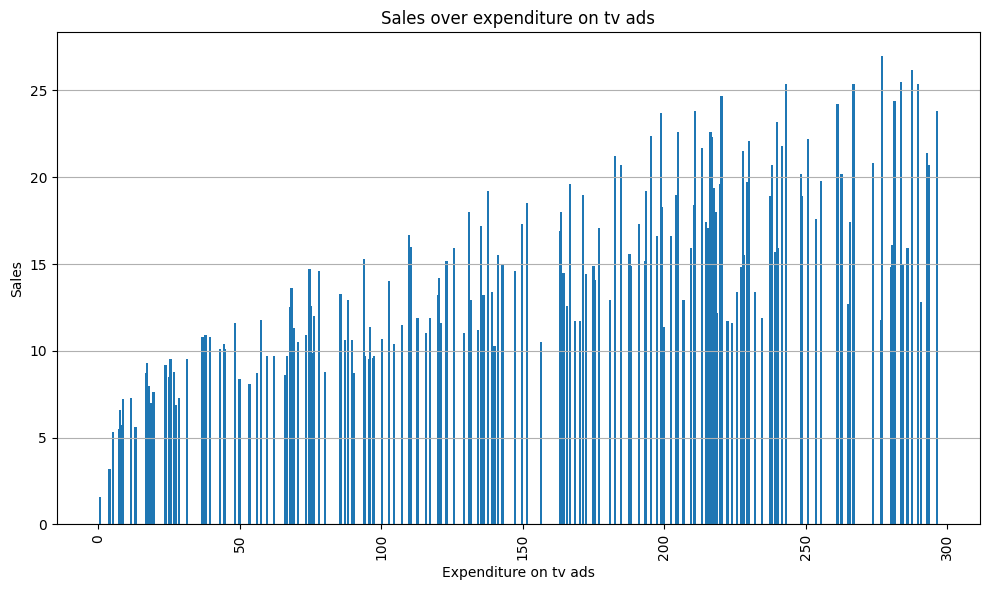

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(data['TV'], data['Sales'])

plt.title('Sales over expenditure on tv ads')
plt.xlabel('Expenditure on tv ads')
plt.ylabel('Sales')
plt.grid(axis='y')  
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


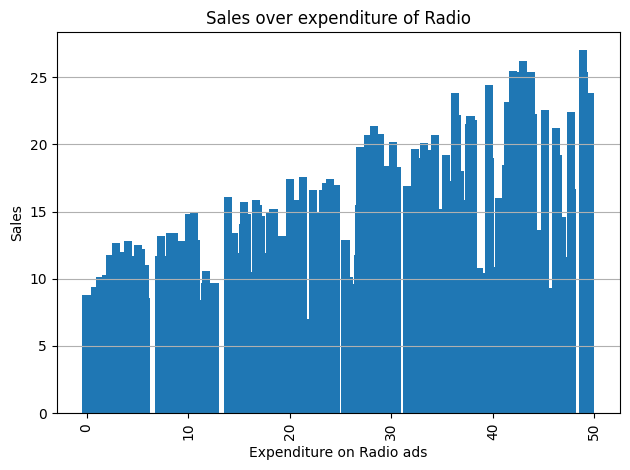

In [117]:

plt.bar(data['Radio'], data['Sales'])

plt.title('Sales over expenditure of Radio')
plt.xlabel('Expenditure on Radio ads')
plt.ylabel('Sales')
plt.grid(axis='y')  
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


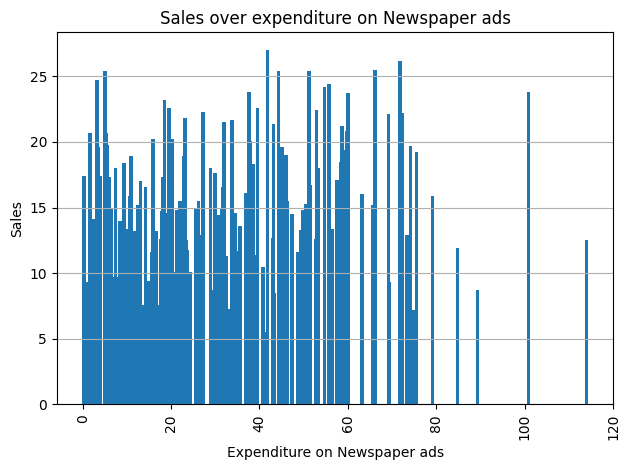

In [118]:

plt.bar(data['Newspaper'], data['Sales'])

plt.title('Sales over expenditure on Newspaper ads')
plt.xlabel('Expenditure on Newspaper ads')
plt.ylabel('Sales')
plt.grid(axis='y')  
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


<Axes: xlabel='Newspaper', ylabel='Sales'>

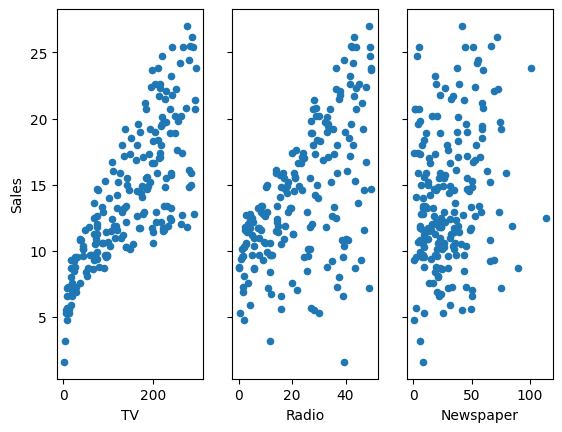

In [119]:
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales', ax=axs[0])
data.plot(kind='scatter',x='Radio',y='Sales', ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales', ax=axs[2])



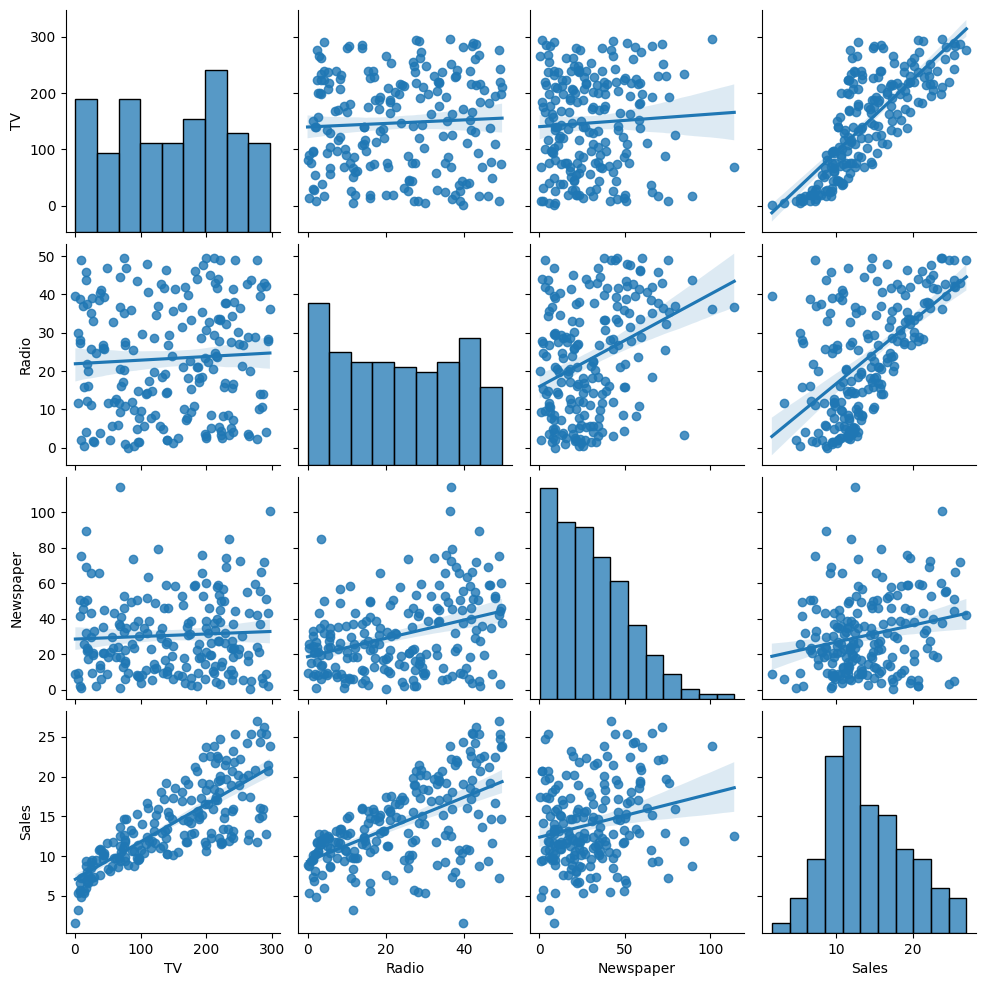

In [120]:
sns.pairplot(data,kind='reg')

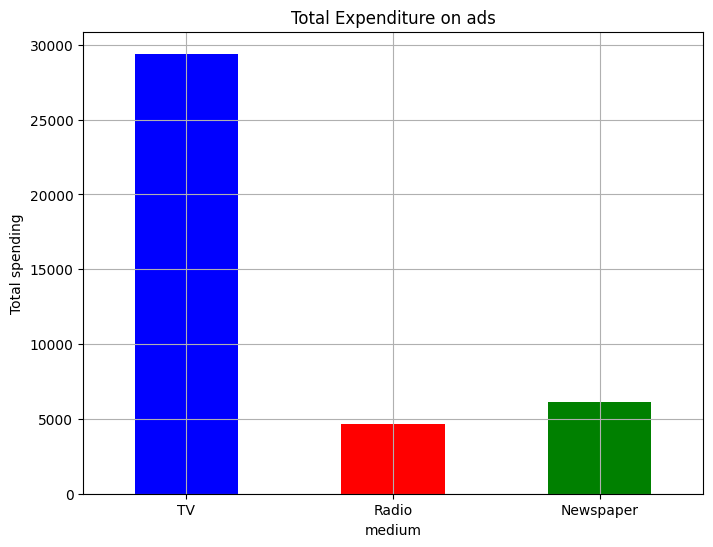

In [121]:
total_spending=df[["TV","Radio","Newspaper"]].sum()
plt.figure(figsize=(8,6))
total_spending.plot(kind="bar",color=["blue","red","green"])
plt.title("Total Expenditure on ads")
plt.xlabel("medium")
plt.ylabel("Total spending")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [122]:
X=data.drop(columns=['Sales'])
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [123]:
y=data['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 3)
(40, 3)
(160,)
(40,)


In [126]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [127]:
y_pred=model.predict(X_test)

In [128]:
y_pred

array([17.698, 21.804, 20.628,  6.793, 22.927, 13.379, 22.376,  9.688,
       11.826, 15.54 ,  7.344,  9.059, 12.109,  4.826, 10.522, 12.69 ,
        6.49 , 16.44 , 11.368, 19.732, 20.181, 12.884, 10.33 , 22.178,
        9.993,  9.006, 22.169, 12.676, 10.201,  5.296, 11.519, 10.904,
       22.165,  8.63 , 15.288, 20.56 , 12.147, 20.523, 12.271,  7.57 ])

In [129]:
accuracy_score=model.score(X_test,y_test)
accuracy_score

0.9812843792541843

In [130]:
accuracy_training_score=model.score(X_train,y_train)
accuracy_training_score

0.9963471037158417

In [132]:
mse=mean_squared_error(y_test,y_pred)
mse

0.5907322499999988

In [133]:
r2=r2_score(y_test,y_pred)
r2

0.9812843792541843

In [134]:
new_data = [[100.3, 30.0, 100.0]]
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [13.968]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
